In [ ]:
import yt
import unyt

import caesar
import numpy as np
import matplotlib.pyplot as plt
# from scipy.stats import binned_statistic

import os
# import XIGrM.gas_properties as g_p
# from XIGrM.gas_properties import m_p, k_B, default_elements
# import XIGrM.X_properties as x_p
# import XIGrM.halo_analysis as h_a
# import XIGrM.prepare_pyatomdb as ppat
# import dill

# from astro_constants import NA_no_units, NA, kB_no_units, kB, mH, mp_no_units, mp, mu_e, mu, G_no_units, G

# import miniball

# Load Files

## Load particle information from snapshot with yt

In [2]:
res_level = '1'
halo_id = '3224'
snap_num = 151

In [3]:
# snap_file = f'/home/b/babul/wcui/data/HYENAS/Level{res_level}/halo_{halo_id}/snap_halo_{halo_id}_{snap_num:03}.hdf5'
# snap_file = f'/home/b/babul/wcui/runs/HYENAS/halo_{halo_id}/snap_halo_{halo_id}_{snap_num:03}.hdf5'
snap_file = f'/project/b/babul/aspadawe/snapshots/HyenasC/L{res_level}/SimbaC_L1_Calibration/halo_{halo_id}/snapshot_{snap_num:03}.hdf5'
# snap_file = f'/scratch/b/babul/aspadawe/snapshots/Hyenasc_L{res_level}_zooms/halo_{halo_id}/snap_halo_{halo_id}_{snap_num:03}.hdf5'
snap = yt.load(snap_file)

yt : [INFO     ] 2025-07-30 21:13:14,822 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-07-30 21:13:14,835 Calculating time from 1.000e+00 to be 4.375e+17 seconds
yt : [INFO     ] 2025-07-30 21:13:14,836 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-07-30 21:13:14,935 Parameters: current_time              = 4.3748565942961094e+17 s
yt : [INFO     ] 2025-07-30 21:13:14,936 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-07-30 21:13:14,936 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-07-30 21:13:14,937 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-07-30 21:13:14,937 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-07-30 21:13:14,938 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2025-07-30 21:13:14,938 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-07-30 21:13:14,938 

## Load caesar file of snapshot

In [4]:
# caesar_file = f'/home/b/babul/wcui/data/HYENAS/Level{res_level}/halo_{halo_id}/Groups/Caesar_halo_{halo_id}_{snap_num:03}.hdf5'
# caesar_file = f'/home/b/babul/wcui/runs/HYENAS/halo_{halo_id}/Groups/Caesar_halo_{halo_id}_{snap_num:03}.hdf5'
caesar_file = f'/project/b/babul/aspadawe/snapshots/HyenasC/L{res_level}/SimbaC_L1_Calibration/halo_{halo_id}/caesar_fof/caesar_{snap_num:03}_haloid-fof_lowres-[2].hdf5'
# caesar_file = f'/scratch/b/babul/aspadawe/snapshots/Hyenasc_L{res_level}_zooms/halo_{halo_id}/groups_fof/caesar_halo_{halo_id}_{snap_num:03}.hdf5'
obj = caesar.load(caesar_file)

yt : [INFO     ] 2025-07-30 21:13:26,020 Opening /project/b/babul/aspadawe/snapshots/HyenasC/L1/SimbaC_L1_Calibration/halo_3224/caesar_fof/caesar_151_haloid-fof_lowres-[2].hdf5
yt : [INFO     ] 2025-07-30 21:13:26,062 Found 17826 halos
yt : [INFO     ] 2025-07-30 21:13:26,067 Found 1343 galaxies


## Set properties

In [5]:
code = 'Simba-C'

In [6]:
## Metal indices
if code.lower() == 'simba':
    # Simba
    metals_idx = {'Z':0, 'He': 1, 'C': 2, 'N': 3, 'O': 4, 'Ne': 5, 'Mg': 6, 'Si': 7, 'S': 8, 'Ca': 9, 'Fe': 10}
    metals_idx_xigrm = {'H':0, 'He': 1, 'C': 2, 'N': 3, 'O': 4, 'Ne': 5, 'Mg': 6, 'Si': 7, 'S': 8, 'Ca': 9, 'Fe': 10}
    elems = ['H', 'He', 'C', 'N', 'O', 'Ne', 'Mg', 'Si', 'S', 'Ca', 'Fe']
elif code.lower() == 'simba-c':
    # Simba-C
    metals_idx = {'Z':0, 'H':1, 'He': 2, 'Li': 3, 'Be': 4, 'B': 5, 'C': 6, 'N': 7, 'O': 8, 'F': 9, 'Ne': 10, 'Na': 11, 'Mg': 12, 'Al':13,
                  'Si': 14, 'P': 15, 'S': 16, 'Cl': 17, 'Ar': 18, 'K': 19,'Ca': 20, 'Sc': 21, 'Ti': 22, 'V': 23, 'Cr': 24,
                  'Mn': 25, 'Fe': 26, 'Co': 27, 'Ni': 28, 'Cu': 29, 'Zn': 30}
    metals_idx_xigrm = {'H':0, 'He': 1, 'Li': 2, 'Be': 3, 'B': 4, 'C': 5, 'N': 6, 'O': 7, 'F': 8, 'Ne': 9, 'Na': 10, 'Mg': 11, 
                        'Al':12, 'Si': 13, 'P': 14, 'S': 15, 'Cl': 16, 'Ar': 17, 'K': 18,'Ca': 19, 'Sc': 20, 'Ti': 21, 'V': 22, 'Cr': 23,
                      'Mn': 24, 'Fe': 25, 'Co': 26, 'Ni': 27, 'Cu': 28, 'Zn': 29}
    elems=['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si',
           'P', 'S', 'Cl', 'Ar', 'K','Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn']#, 'Ga', 'Ge']\n",
else:
    raise SystemExit('Code is not Simba or Simba-C')

# Get data

## Snapshot properties

In [7]:
age = snap.current_time.in_units('Gyr')

In [8]:
age

unyt_quantity(13.86308399, 'Gyr')

In [9]:
redshift = snap.current_redshift

In [10]:
redshift

np.float64(4.440892098500626e-16)

In [11]:
snap.field_list

yt : [INFO     ] 2025-07-30 21:13:30,720 Allocating for 4.317e+07 particles
Loading particle index: 100%|██████████| 78/78 [00:00<00:00, 3779.57it/s]


[('PartType0', 'AGS-Softening'),
 ('PartType0', 'AccKey'),
 ('PartType0', 'Coordinates'),
 ('PartType0', 'DelayTime'),
 ('PartType0', 'Density'),
 ('PartType0', 'Dust_Masses'),
 ('PartType0', 'Dust_Metallicity'),
 ('PartType0', 'ElectronAbundance'),
 ('PartType0', 'FractionH2'),
 ('PartType0', 'GrackleHI'),
 ('PartType0', 'GrackleHII'),
 ('PartType0', 'GrackleHM'),
 ('PartType0', 'GrackleHeI'),
 ('PartType0', 'GrackleHeII'),
 ('PartType0', 'GrackleHeIII'),
 ('PartType0', 'HaloID'),
 ('PartType0', 'ID_Generations'),
 ('PartType0', 'InternalEnergy'),
 ('PartType0', 'Masses'),
 ('PartType0', 'Metallicity_00'),
 ('PartType0', 'Metallicity_01'),
 ('PartType0', 'Metallicity_02'),
 ('PartType0', 'Metallicity_03'),
 ('PartType0', 'Metallicity_04'),
 ('PartType0', 'Metallicity_05'),
 ('PartType0', 'Metallicity_06'),
 ('PartType0', 'Metallicity_07'),
 ('PartType0', 'Metallicity_08'),
 ('PartType0', 'Metallicity_09'),
 ('PartType0', 'Metallicity_10'),
 ('PartType0', 'Metallicity_11'),
 ('PartType

In [12]:
snap.derived_field_list

[('PartType0', 'AGS-Softening'),
 ('PartType0', 'AccKey'),
 ('PartType0', 'C_metallicity'),
 ('PartType0', 'C_nuclei_density'),
 ('PartType0', 'C_nuclei_mass_density'),
 ('PartType0', 'Ca_metallicity'),
 ('PartType0', 'Ca_nuclei_density'),
 ('PartType0', 'Ca_nuclei_mass_density'),
 ('PartType0', 'Coordinates'),
 ('PartType0', 'DelayTime'),
 ('PartType0', 'Density'),
 ('PartType0', 'Dust_Masses'),
 ('PartType0', 'Dust_Metallicity'),
 ('PartType0', 'El_number_density'),
 ('PartType0', 'ElectronAbundance'),
 ('PartType0', 'Fe_metallicity'),
 ('PartType0', 'Fe_nuclei_density'),
 ('PartType0', 'Fe_nuclei_mass_density'),
 ('PartType0', 'FractionH2'),
 ('PartType0', 'GrackleHI'),
 ('PartType0', 'GrackleHII'),
 ('PartType0', 'GrackleHM'),
 ('PartType0', 'GrackleHeI'),
 ('PartType0', 'GrackleHeII'),
 ('PartType0', 'GrackleHeIII'),
 ('PartType0', 'H_nuclei_density'),
 ('PartType0', 'H_p0_density'),
 ('PartType0', 'H_p0_fraction'),
 ('PartType0', 'H_p0_mass'),
 ('PartType0', 'H_p0_number_density'

In [13]:
snap.domain_width.in_units('Mpc/h')

unyt_array([200., 200., 200.], 'Mpc/h')

In [14]:
snap.particle_types

('PartType1',
 'PartType5',
 'PartType0',
 'PartType2',
 'PartType4',
 'all',
 'nbody')

In [15]:
snap.particle_types_raw

('PartType1', 'PartType5', 'PartType0', 'PartType2', 'PartType4')

In [16]:
snap.particle_type_counts

{'PartType0': np.int64(18134661),
 'PartType1': np.int64(20206760),
 'PartType2': np.int64(3336796),
 'PartType3': np.int64(0),
 'PartType4': np.int64(1493743),
 'PartType5': np.int64(1500)}

## Particle data

In [17]:
data = snap.all_data()

In [18]:
print(snap.field_info['gas', 'temperature'].get_source())

    def _TranslationFunc(field, data):
        # We do a bunch of in-place modifications, so we will copy this.
        return data[field_name].copy()



def gas_entropy(field, data):
    return data["gas", "kT"] * data["gas", "El_number_density"] ** (-2.0/3.0)

def gas_entropy2(field, data):
    return data["gas", "kT"] * data["PartType0", "El_number_density"] ** (-2.0/3.0)

snap.add_field(
    ("gas", "gas_entropy"),
    units="keV*cm**2",
    function=gas_entropy,
    sampling_type="cell",
)

snap.add_field(
    ("PartType0", "gas_entropy"),
    units="keV*cm**2",
    function=gas_entropy2,
    sampling_type="particle",
    force_override=True
)

print(snap.field_info['gas', 'kT'].get_source())

print(snap.field_info['gas', 'entropy'].get_source())

print(snap.field_info['gas', 'gas_entropy'].get_source())

print(snap.field_info['PartType0', 'gas_entropy'].get_source())

print(snap.field_info['gas', 'radius'].get_source())

gas_entropy = data['gas', 'entropy']

gas_entropy

gas_entropy.units

print(snap.field_info['all', 'Potential'].get_source())

data['all', 'Potential']

data['gas', 'particle_position']

data['gas', 'position']

np.max(data['PartType5', 'Masses'].in_units('Msun'))

np.max(data['PartType5', 'BH_Mass'].in_units('Msun'))

data['gas', 'temperature']

data['gas', 'El_number_density']

## Find desired halo in snapshot

In [19]:
target_m500c = unyt.unyt_array(1e13, 'Msun')

In [20]:
target_m500c

unyt_array(1.e+13, 'Msun')

In [21]:
halo_minpotpos = unyt.unyt_array([halo.minpotpos.in_units('kpccm/h') for halo in obj.halos])

In [22]:
halo_minpotpos

unyt_array([[103045.695,  96578.336,  97584.016],
       [104966.625,  91971.055, 104498.49 ],
       [105152.664,  89653.06 , 107370.69 ],
       ...,
       [104450.62 ,  96926.02 ,  95253.75 ],
       [105121.086,  90544.86 , 105802.62 ],
       [103836.58 ,  95396.49 ,  99454.89 ]],
      shape=(17826, 3), dtype=float32, units='kpccm/h')

In [23]:
com_x = np.sum(halo_minpotpos[:, 0]) / len(obj.halos)
com_y = np.sum(halo_minpotpos[:, 1]) / len(obj.halos)
com_z = np.sum(halo_minpotpos[:, 2]) / len(obj.halos)

# cui_minpotpos = [103161.32, 136991.281, 104131.414]
cui_minpotpos = np.array([1.031156640625000000e+05, 9.639104687500000000e+04, 9.784025000000000000e+04])#/0.68**2
cui_r200 = 571.627 # ckpc/h

print(com_x, com_y, com_z)

103119.4596656569 kpccm/h 96271.29451363177 kpccm/h 97912.71894984854 kpccm/h


In [24]:
new_computer_time = snap.all_data()

In [25]:
new_computer_time[('PartType2', 'Masses')]

unyt_array([3.17596130e+01, 3.17596130e+01, 3.17596130e+01, ...,
       7.75381178e-03, 7.75381178e-03, 7.75381178e-03], shape=(3336796,), units='code_mass')

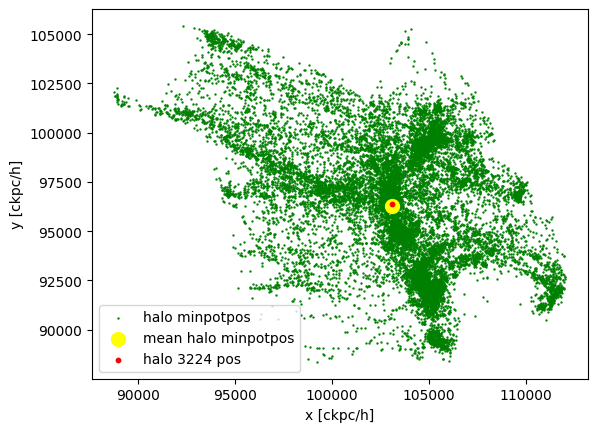

In [26]:
plt.scatter(halo_minpotpos[:,0], halo_minpotpos[:,1], s=0.5, c='g', label='halo minpotpos')
plt.scatter(com_x, com_y, s=100, c='yellow', label='mean halo minpotpos')
plt.scatter(cui_minpotpos[0], cui_minpotpos[1], s=10, color='r', label='halo 3224 pos')
plt.xlabel('x [ckpc/h]')
plt.ylabel('y [ckpc/h]')
plt.legend()

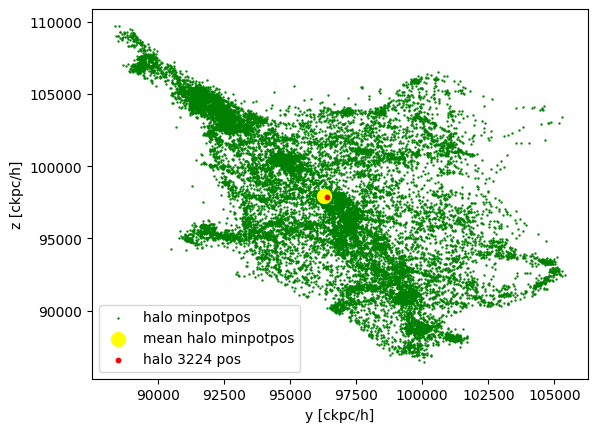

In [27]:
plt.scatter(halo_minpotpos[:,1], halo_minpotpos[:,2], s=0.5, c='g', label='halo minpotpos')
plt.scatter(com_y, com_z, s=100, c='yellow', label='mean halo minpotpos')
plt.scatter(cui_minpotpos[1], cui_minpotpos[2], s=10, color='r', label='halo 3224 pos')
plt.xlabel('y [ckpc/h]')
plt.ylabel('z [ckpc/h]')
plt.legend()

In [28]:
halo_m500c = unyt.unyt_array([halo.virial_quantities['m500c'] for halo in obj.halos])

In [29]:
halo_m500c

unyt_array([8.47041633e+12, 6.26862116e+12, 4.88252165e+12, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00], shape=(17826,), units='Msun')

In [30]:
halo_contamination = unyt.unyt_array([halo.contamination for halo in obj.halos])

In [31]:
halo_contamination

unyt_array([0.        , 0.00345884, 0.11162941, ..., 0.        , 0.        ,
       0.        ], shape=(17826,), units='(dimensionless)')

In [32]:
halo_nonzero_contamination_index = np.nonzero(np.array(halo_contamination)!=0)[0]

In [33]:
halo_nonzero_contamination_index

array([    1,     2,     6,     7,     8,     9,    10,    12,    13,
          16,    17,    18,    20,    22,    26,    27,    30,    31,
          33,    34,    35,    42,    48,    52,    53,    54,    55,
          57,    58,    59,    60,    63,    68,    70,    72,    74,
          77,    80,    83,    88,    91,    93,    94,    96,    97,
          98,   102,   104,   106,   112,   113,   115,   119,   120,
         122,   125,   132,   133,   134,   139,   141,   144,   146,
         147,   152,   153,   155,   158,   159,   176,   177,   179,
         184,   185,   188,   190,   193,   194,   196,   202,   203,
         209,   210,   213,   220,   223,   225,   229,   231,   238,
         240,   242,   251,   253,   261,   266,   267,   268,   271,
         277,   278,   280,   287,   288,   289,   290,   291,   292,
         295,   298,   299,   308,   310,   314,   316,   319,   324,
         326,   329,   330,   337,   342,   345,   352,   357,   360,
         364,   365,

In [34]:
halo_contamination0_index = np.nonzero(np.array(halo_contamination)==0)[0]
# halo_contamination0_index = np.array(halo_contamination)==0

In [35]:
halo_contamination0_index

array([    0,     3,     4, ..., 17823, 17824, 17825], shape=(17112,))

In [36]:
value_of_contamination0 = min(np.log10(halo_contamination)[np.array(halo_contamination)>0])-1

/project/b/babul/aspadawe/pyenvs/visualize_with_yt_ondemand/lib/python3.13/site-packages/unyt/array.py:1832: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


/tmp/ipykernel_2329683/625012381.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(np.array(halo_m500c)[halo_contamination0_index]),


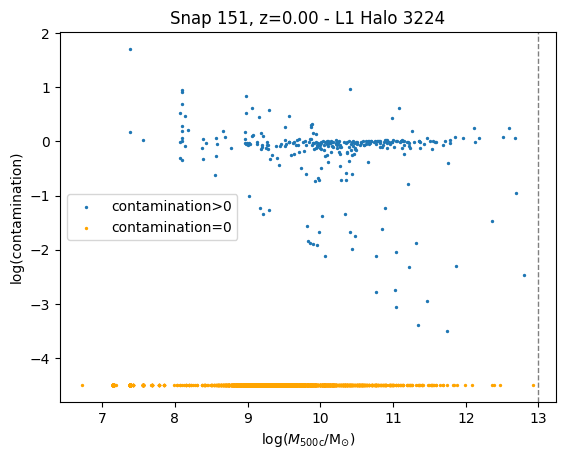

In [37]:
plt.scatter(np.log10(halo_m500c), np.log10(halo_contamination), s=2, label='contamination>0')
plt.scatter(np.log10(np.array(halo_m500c)[halo_contamination0_index]),
            np.full(len(halo_contamination0_index), value_of_contamination0),
            s=2, color='orange', label='contamination=0')
plt.axvline(np.log10(target_m500c), ls='--', lw=1, color='grey')
plt.title(f'Snap {snap_num}, z={redshift:.2f} - L{res_level} Halo {halo_id}')
plt.xlabel(r'$\log(M_{500\mathrm{c}}/\mathrm{M_{\odot}})$')
plt.ylabel('log(contamination)')
plt.legend()

In [38]:
halo_m500c_nonzero_contamination = np.array(halo_m500c)[halo_nonzero_contamination_index]

In [39]:
halo_m500c_contamination0 = np.array(halo_m500c)[halo_contamination0_index]

In [40]:
m500c_check_list = [1e6, 1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14]

In [41]:
print(f'Number of contaminated halos: {len(halo_nonzero_contamination_index)}')

Number of contaminated halos: 714


In [42]:
print(f'Number of uncontaminated halos: {len(halo_contamination0_index)}')

Number of uncontaminated halos: 17112


In [43]:
for ii in range(len(m500c_check_list)):
    m500c_to_check = m500c_check_list[ii]
    
    idx_m500c_contaminated = np.where(halo_m500c_nonzero_contamination>=m500c_to_check)[0]
    # print(idx_m500c_contaminated)
    m500c_contaminated = halo_m500c_nonzero_contamination[idx_m500c_contaminated]
    # print(m500c_contaminated)
    # print(rf'Number of contaminated halos with M500>={m500c_to_check:.0e}Msun: {len(m500c_contaminated)}')

    idx_m500c_uncontaminated = np.where(halo_m500c_contamination0>=m500c_to_check)[0]
    # print(idx_m500c_uncontaminated)
    m500c_uncontaminated = halo_m500c_contamination0[idx_m500c_uncontaminated]
    # print(m500c_uncontaminated)
    # print(rf'Number of uncontaminated halos with M500>={m500c_to_check:.0e}Msun: {len(m500c_uncontaminated)}')

    # print()

    try:
        next_m500c = m500c_check_list[ii+1]
    except:
        print('No next m500c')
        continue

    idx_m500c_contaminated = np.where(np.logical_and(halo_m500c_nonzero_contamination>=m500c_to_check, halo_m500c_nonzero_contamination<next_m500c))[0]
    # print(idx_m500c_contaminated)
    m500c_contaminated = halo_m500c_nonzero_contamination[idx_m500c_contaminated]
    # print(m500c_contaminated)
    print(rf'Number of contaminated halos with M500>={m500c_to_check:.0e}Msun and M500<{next_m500c:.0e}Msun: {len(m500c_contaminated)}')

    idx_m500c_uncontaminated = np.where(np.logical_and(halo_m500c_contamination0>=m500c_to_check, halo_m500c_contamination0<next_m500c))[0]
    # print(idx_m500c_contaminated)
    m500c_uncontaminated = halo_m500c_contamination0[idx_m500c_uncontaminated]
    # print(m500c_contaminated)
    print(rf'Number of uncontaminated halos with M500>={m500c_to_check:.0e}Msun and M500<{next_m500c:.0e}Msun: {len(m500c_uncontaminated)}')

    # print()
    print()

Number of contaminated halos with M500>=1e+06Msun and M500<1e+07Msun: 0
Number of uncontaminated halos with M500>=1e+06Msun and M500<1e+07Msun: 1

Number of contaminated halos with M500>=1e+07Msun and M500<1e+08Msun: 3
Number of uncontaminated halos with M500>=1e+07Msun and M500<1e+08Msun: 616

Number of contaminated halos with M500>=1e+08Msun and M500<1e+09Msun: 34
Number of uncontaminated halos with M500>=1e+08Msun and M500<1e+09Msun: 427

Number of contaminated halos with M500>=1e+09Msun and M500<1e+10Msun: 84
Number of uncontaminated halos with M500>=1e+09Msun and M500<1e+10Msun: 1830

Number of contaminated halos with M500>=1e+10Msun and M500<1e+11Msun: 121
Number of uncontaminated halos with M500>=1e+10Msun and M500<1e+11Msun: 414

Number of contaminated halos with M500>=1e+11Msun and M500<1e+12Msun: 49
Number of uncontaminated halos with M500>=1e+11Msun and M500<1e+12Msun: 53

Number of contaminated halos with M500>=1e+12Msun and M500<1e+13Msun: 9
Number of uncontaminated halos 

In [44]:
unyt.unyt_array(halo_m500c)

unyt_array([8.47041633e+12, 6.26862116e+12, 4.88252165e+12, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00], shape=(17826,), units='Msun')

In [45]:
## Using only halos with 0 contamination, choose halo with mass closest to target mass
halo_m500c_contamination0 = unyt.unyt_array(halo_m500c)[halo_contamination0_index]
# index_of_halo_with_contamination0_and_target_m500c = 
target_halo_index = halo_contamination0_index[np.argmin(np.abs(halo_m500c_contamination0 - target_m500c))]

In [46]:
target_halo_index

np.int64(0)

In [47]:
target_halo = obj.halos[target_halo_index]

## Get halo properties of target halo

In [48]:
target_halo_minpotpos = target_halo.minpotpos.in_units('Mpc')

In [49]:
target_halo_minpotpos

unyt_array([151.5378 , 142.02698, 143.50592], dtype=float32, units='Mpc')

In [50]:
target_halo_m200c = target_halo.virial_quantities['m200c']

In [51]:
target_halo_m200c

unyt_quantity(1.31998438e+13, 'Msun')

In [52]:
np.log10(target_halo_m200c)

array(13.12056879)

In [53]:
target_halo_m500c = target_halo.virial_quantities['m500c']

In [54]:
target_halo_m500c

unyt_quantity(8.47041633e+12, 'Msun')

In [55]:
np.log10(target_halo_m500c)

array(12.92790476)

In [56]:
target_halo_contamination = target_halo.contamination

In [57]:
target_halo_contamination

np.float64(0.0)

In [58]:
target_halo_r500c = target_halo.virial_quantities['r500c'].in_units('Mpc')

In [59]:
target_halo_r500c

unyt_quantity(0.31586105, 'Mpc')

In [60]:
target_halo_r200c = target_halo.virial_quantities['r200c'].in_units('Mpc')

In [61]:
target_halo_r200c

unyt_quantity(0.49700937, 'Mpc')

/tmp/ipykernel_2329683/2520355547.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(np.array(halo_m500c)[halo_contamination0_index]),


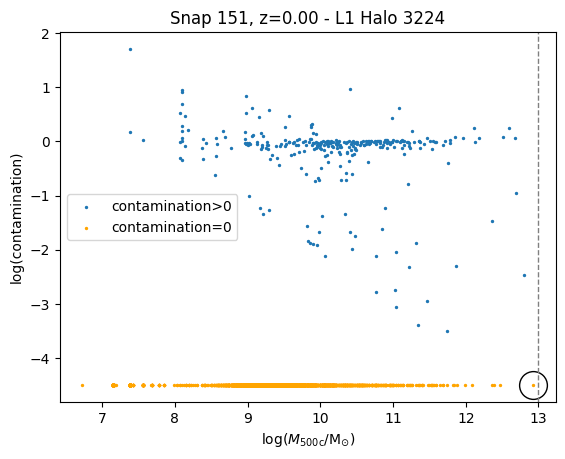

In [62]:
plt.scatter(np.log10(halo_m500c), np.log10(halo_contamination), s=2, label='contamination>0')
plt.scatter(np.log10(np.array(halo_m500c)[halo_contamination0_index]),
            np.full(len(halo_contamination0_index), value_of_contamination0),
            s=2, color='orange', label='contamination=0')
plt.plot(np.log10(target_halo_m500c),
         target_halo_contamination if target_halo_contamination>0 else value_of_contamination0,
         'o', ms=20, mec='black', mfc='none', mew=1)
plt.axvline(np.log10(target_m500c), ls='--', lw=1, color='grey')
plt.title(f'Snap {snap_num}, z={redshift:.2f} - L{res_level} Halo {halo_id}')
plt.xlabel(r'$\log(M_{500\mathrm{c}}/\mathrm{M_{\odot}})$')
plt.ylabel('log(contamination)')
plt.legend()

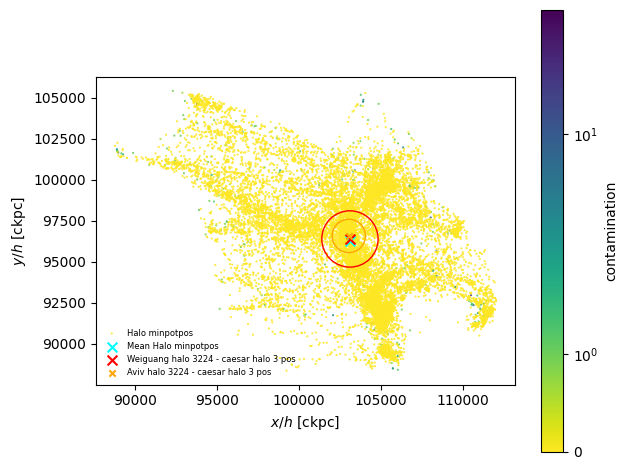

In [63]:
p=plt.scatter(halo_minpotpos[:,0], halo_minpotpos[:,1],
            s=0.25, c=halo_contamination, cmap='viridis_r', norm='symlog',
            label='Halo minpotpos')
plt.scatter(com_x, com_y, s=50, c='cyan', marker='x', label='Mean Halo minpotpos')
plt.scatter(cui_minpotpos[0], cui_minpotpos[1], s=50, marker='x', c='r',
            label='Weiguang halo 3224 - caesar halo 3 pos')
cui_circle = plt.Circle((cui_minpotpos[0], cui_minpotpos[1]), 3*cui_r200, fill=False, ec='r', lw=1)
plt.gca().add_patch(cui_circle)
plt.scatter(target_halo_minpotpos[0].in_units('kpccm/h'), target_halo_minpotpos[1].in_units('kpccm/h'),
            s=20, marker='x', c='orange', label='Aviv halo 3224 - caesar halo 3 pos')
aviv_circle = plt.Circle((target_halo_minpotpos[0].in_units('kpccm/h'), target_halo_minpotpos[1].in_units('kpccm/h')),
                         3*target_halo_r200c.in_units('kpccm/h'), fill=False, ec='orange', lw=1)
plt.gca().add_patch(aviv_circle)
plt.xlabel(r'$x/h$ [ckpc]')
plt.ylabel(r'$y/h$ [ckpc]')
plt.colorbar(mappable=p, label='contamination')
plt.legend(fontsize=6, framealpha=0)
plt.gca().set_aspect('equal')
plt.tight_layout()

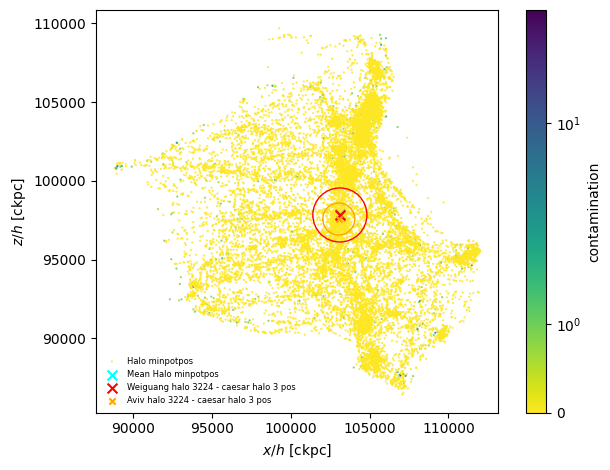

In [64]:
p=plt.scatter(halo_minpotpos[:,0], halo_minpotpos[:,2],
            s=0.25, c=halo_contamination, cmap='viridis_r', norm='symlog',
            label='Halo minpotpos')
plt.scatter(com_x, com_z, s=50, c='cyan', marker='x', label='Mean Halo minpotpos')
plt.scatter(cui_minpotpos[0], cui_minpotpos[2], s=50, marker='x', c='r',
            label='Weiguang halo 3224 - caesar halo 3 pos')
cui_circle = plt.Circle((cui_minpotpos[0], cui_minpotpos[2]), 3*cui_r200, fill=False, ec='r', lw=1)
plt.gca().add_patch(cui_circle)
plt.scatter(target_halo_minpotpos[0].in_units('kpccm/h'), target_halo_minpotpos[2].in_units('kpccm/h'),
            s=20, marker='x', c='orange', label='Aviv halo 3224 - caesar halo 3 pos')
aviv_circle = plt.Circle((target_halo_minpotpos[0].in_units('kpccm/h'), target_halo_minpotpos[2].in_units('kpccm/h')),
                         3*target_halo_r200c.in_units('kpccm/h'), fill=False, ec='orange', lw=1)
plt.gca().add_patch(aviv_circle)
plt.xlabel(r'$x/h$ [ckpc]')
plt.ylabel(r'$z/h$ [ckpc]')
plt.colorbar(mappable=p, label='contamination')
plt.legend(fontsize=6, framealpha=0)
plt.gca().set_aspect('equal')
plt.tight_layout()

## Add relevant properties

In [65]:
data.set_field_parameter('center', target_halo_minpotpos)

In [66]:
def radius_r500c(field, data):
    # print(field)
    # print(data)
    return data['gas', 'radius']/target_halo_r500c

In [67]:
snap.add_field(
    name=('gas', 'r_r500'),
    display_name=r'$R/R_{500\mathrm{c}}$',
    units='',
    function=radius_r500c,
    sampling_type='particle',
    force_override=True,
)

In [68]:
# data = snap.all_data()

In [69]:
data['gas', 'r_r500']

unyt_array([23.23081121, 23.229799  , 23.22547889, ..., 29.31786652,
       29.01334473, 28.68409346], shape=(18134661,), units='(dimensionless)')

In [70]:
def radius_r200c(field, data):
    # print(field)
    # print(data)
    return data['gas', 'radius']/target_halo_r200c

In [71]:
snap.add_field(
    name=('gas', 'r_r200'),
    display_name=r'$R/R_{200\mathrm{c}}$',
    units='',
    function=radius_r200c,
    sampling_type='particle',
    force_override=True,
)

In [72]:
# data = snap.all_data()

In [73]:
data['gas', 'r_r200']

unyt_array([14.7637227 , 14.76307942, 14.76033389, ..., 18.63218841,
       18.43865771, 18.22941084], shape=(18134661,), units='(dimensionless)')

In [74]:
data['gas', 'entropy']

/project/b/babul/aspadawe/pyenvs/visualize_with_yt_ondemand/lib/python3.13/site-packages/unyt/array.py:1972: RuntimeWarning: divide by zero encountered in power
  out_arr = func(


unyt_array([2.75845062e+02, 1.83340058e-01, 1.61513041e-01, ...,
       1.83005665e+01, 1.74702416e+01, 1.65959760e+01], shape=(18134661,), units='cm**2*keV')

In [75]:
# def gas_entropy(field, data):
#     print(field)
#     print(data)
#     return data['gas', 'entropy']

In [76]:
def gas_entropy(field, data):
    # print(field)
    # print(data)
    return data["gas", "kT"] * data["gas", "El_number_density"] ** (-2.0/3.0)

In [77]:
snap.add_field(
    name=('gas', 'entropy_'),
    display_name=r'$K$',
    units='keV*cm**2',
    function=gas_entropy,
    sampling_type='particle',
    force_override=True,
)

/project/b/babul/aspadawe/pyenvs/visualize_with_yt_ondemand/lib/python3.13/site-packages/unyt/array.py:1972: RuntimeWarning: invalid value encountered in power
  out_arr = func(


In [78]:
data['gas', 'entropy_']

unyt_array([2.75845062e+02, 1.83340058e-01, 1.61513041e-01, ...,
       1.83005665e+01, 1.74702416e+01, 1.65959760e+01], shape=(18134661,), units='cm**2*keV')

In [61]:
def gas_entropy(field, data):
    return data["gas", "kT"] * data["gas", "El_number_density"] ** (-2.0/3.0)

In [184]:
def gas_entropy2(field, data):
    return data["gas", "kT"] * data["PartType0", "El_number_density"] ** (-2.0/3.0)

In [185]:
snap.add_field(
    ("gas", "gas_entropy"),
    units="keV*cm**2",
    function=gas_entropy,
    sampling_type="cell",
)

/project/b/babul/aspadawe/pyenvs/visualize_with_yt_ondemand/lib/python3.13/site-packages/unyt/array.py:1972: RuntimeWarning: invalid value encountered in power
  out_arr = func(


In [186]:
snap.add_field(
    ("PartType0", "gas_entropy"),
    units="keV*cm**2",
    function=gas_entropy2,
    sampling_type="particle",
    force_override=True
)

## Make sphere around target halo

In [120]:
# sphere_radius = 2*target_halo_r200c
# sphere_radius = 1.1*5*target_halo_r500c
sphere_radius = 1.1*0.15*target_halo_r500c
# sphere_radius = target_halo_r500c
# sphere_radius = 1.1 * 0.05 * target_halo_r500c

In [121]:
sphere_radius#.in_units('Mpc/h')

unyt_quantity(0.05211707, 'Mpc')

In [115]:
target_halo_minpotpos

unyt_array([151.5378 , 142.02698, 143.50592], dtype=float32, units='Mpc')

In [116]:
sphere = snap.sphere(target_halo_minpotpos.in_units('kpc'), sphere_radius.in_units('kpc'))

In [268]:
(((sphere['gas', 'particle_position_x']-target_halo_minpotpos[0])**2 + (sphere['gas', 'particle_position_y']-target_halo_minpotpos[1])**2 + (sphere['gas', 'particle_position_z']-target_halo_minpotpos[2])**2)**0.5).in_units('Mpc').max()

unyt_quantity(1.21902575, 'Mpc')

In [269]:
sphere['gas', 'radius'].in_units('Mpc').max()

unyt_quantity(1.21903388, 'Mpc')

In [270]:
sphere['PartType0', 'particle_radius'].in_units('Mpc').max()

unyt_quantity(1.21903388, 'Mpc')

In [271]:
sphere['gas', 'particle_position_x'].in_units('Mpc').max()

unyt_quantity(152.63886719, 'Mpc')

In [118]:
sphere.set_field_parameter('axis', 0)
sphere.set_field_parameter('center', target_halo_minpotpos)

In [70]:
# Calculate and store the bulk velocity for the sphere.
bulk_velocity = sphere.quantities.bulk_velocity()
print(bulk_velocity)
sphere.set_field_parameter("bulk_velocity", bulk_velocity)

[ 22659441.37402884 -21478062.43315618 -11398320.94655922] cm/s


In [71]:
sphere.quantities.keys()

dict_keys(['WeightedAverageQuantity', 'TotalQuantity', 'TotalMass', 'CenterOfMass', 'BulkVelocity', 'WeightedStandardDeviation', 'AngularMomentumVector', 'Extrema', 'SampleAtMaxFieldValues', 'MaxLocation', 'SampleAtMinFieldValues', 'MinLocation', 'SpinParameter'])

In [119]:
len(sphere['gas', 'ones'])

1047356

## Isolate IGrM in sphere

In [101]:
sphere_igrm = sphere.cut_region(["obj['gas', 'temperature'].in_units('K') >= 5e5", 
                                 "obj['gas', 'H_nuclei_density'].in_units('cm**-3') <= 0.13",
                                 "obj['PartType0', 'DelayTime'] == 0"])

In [102]:
sphere_igrm

YTCutRegion (snapshot_151): , base_object=YTSphere (snapshot_151): , center=[4.67596788e+26 4.38249492e+26 4.42813026e+26] cm, radius=1.4619680570724554e+23 cm, conditionals=["obj['gas', 'temperature'].in_units('K') >= 5e5", "obj['gas', 'H_nuclei_density'].in_units('cm**-3') <= 0.13", "obj['PartType0', 'DelayTime'] == 0"]

In [121]:
sphere_cut = sphere.cut_region(["obj['PartType0', 'DelayTime'] == 0"])

In [87]:
sphere_ism = sphere.cut_region(["obj['gas', 'temperature'].in_units('K') < 5e5", 
                                "obj['gas', 'H_nuclei_density'].in_units('cm**-3') > 0.13",
                                "obj['PartType0', 'DelayTime'] == 0"])

In [88]:
sphere_ism

YTCutRegion (snapshot_151): , base_object=YTSphere (snapshot_151): , center=[4.68049430e+26 4.37251255e+26 4.44194242e+26] cm, radius=2.976870730361551e+24 cm, conditionals=["obj['gas', 'temperature'].in_units('K') < 5e5", "obj['gas', 'H_nuclei_density'].in_units('cm**-3') > 0.13", "obj['PartType0', 'DelayTime'] == 0"]

In [103]:
len(sphere['gas', 'ones'])

10577

In [104]:
len(sphere_igrm['gas', 'ones'])

6416

In [105]:
len(sphere_cut['gas', 'temperature'])

NameError: name 'sphere_cut' is not defined

In [89]:
len(sphere_ism['gas', 'temperature'])

539

sphere_igrm = snap.cut_region(data_source=sphere, 
                       conditionals=["obj['gas', 'temperature'].in_units('K') >= 5e5", 
                                     "obj['gas', 'H_nuclei_density'].in_units('cm**-3') <= 0.13",
                                     "obj['PartType0', 'DelayTime'] == 0"])

sphere_igrm

len(sphere_igrm['gas', 'temperature'])

In [77]:
np.unique(sphere['PartType0', 'DelayTime'])

unyt_array([0.00000000e+00, 1.57468487e-04, 4.45439899e-03, 8.14587716e-03,
       1.28851207e-02, 1.39379287e-02, 2.06841044e-02, 2.46906970e-02,
       2.82761529e-02, 2.89089661e-02, 3.65038030e-02, 5.59257641e-02,
       6.18385449e-02, 6.31091818e-02, 6.64893910e-02, 6.94445372e-02,
       9.16432887e-02, 9.71433818e-02, 9.90476012e-02, 9.92591828e-02,
       9.98942479e-02, 1.10899620e-01, 1.21486969e-01, 1.26782477e-01,
       1.30807906e-01, 1.40768528e-01, 1.43100336e-01, 1.46492511e-01,
       1.47764713e-01, 1.48824900e-01, 1.51369631e-01, 1.52430043e-01,
       1.52444080e-01, 1.53702527e-01, 1.55611441e-01, 1.56778082e-01,
       1.57944784e-01, 1.58793658e-01, 1.59854040e-01, 1.60914823e-01,
       1.62187785e-01, 1.62513092e-01, 1.65370569e-01, 1.66226476e-01,
       1.66643813e-01, 1.66856021e-01, 1.67917117e-01, 1.68766007e-01,
       1.69462934e-01, 1.69614971e-01, 1.69827208e-01, 1.70463920e-01,
       1.70888409e-01, 1.71525180e-01, 1.71949700e-01, 1.73011035e-01,
 

In [78]:
len(np.where(data['PartType0', 'DelayTime']<=0)[0])

17886381

In [79]:
len(np.where(data['PartType0', 'DelayTime']<0)[0])

0

In [80]:
len(np.where(data['PartType0', 'DelayTime']>0)[0])

19892

In [81]:
len(np.where(data['PartType0', 'DelayTime']>=0)[0])

17906273

In [82]:
data['gas', 'temperature']

unyt_array([ 94108.94634025, 157660.88461431, 128424.12201122, ...,
         7335.07012145,   8804.33184584,  12643.59812445],
      shape=(17906273,), units='K')

In [84]:
len(data['gas', 'temperature'])

17906273

In [279]:
sphere_igrm['gas', 'entropy']

unyt_array([  44.1848918 ,  149.85627459,  110.29404819, ..., 1729.29759852,
       1638.79101836, 1623.87642028], shape=(729574,), units='cm**2*keV')

In [280]:
sphere_igrm['gas', 'entropy_']

unyt_array([  44.1848918 ,  149.85627459,  110.29404819, ..., 1729.29759852,
       1638.79101836, 1623.87642028], shape=(729574,), units='cm**2*keV')

In [281]:
sphere['gas', 'radius'].in_units('kpc')

unyt_array([ 422.44347966,  426.57286866,  423.30896883, ..., 1073.92263965,
       1079.35347078, 1094.33187991], shape=(776710,), units='kpc')

In [282]:
sphere['gas', 'radius'].in_units('kpc').min()

unyt_quantity(0.4985472, 'kpc')

In [283]:
sphere_igrm['gas', 'radius'].in_units('kpc').min()

unyt_quantity(0.97324534, 'kpc')

In [284]:
sphere_igrm.center.in_units('Mpc')

unyt_array([151.53779871, 142.0269761 , 143.50591682], 'Mpc')

In [285]:
sphere_igrm['gas', 'r_r500'].max()

unyt_quantity(3.84445086, '(dimensionless)')

In [286]:
sphere_igrm['gas', 'r_r200'].max()

unyt_quantity(2.44323919, '(dimensionless)')

# Calculate profile with yt

/project/b/babul/aspadawe/pyenvs/visualize_with_yt_ondemand/lib/python3.13/site-packages/unyt/array.py:1972: RuntimeWarning: divide by zero encountered in power
  out_arr = func(



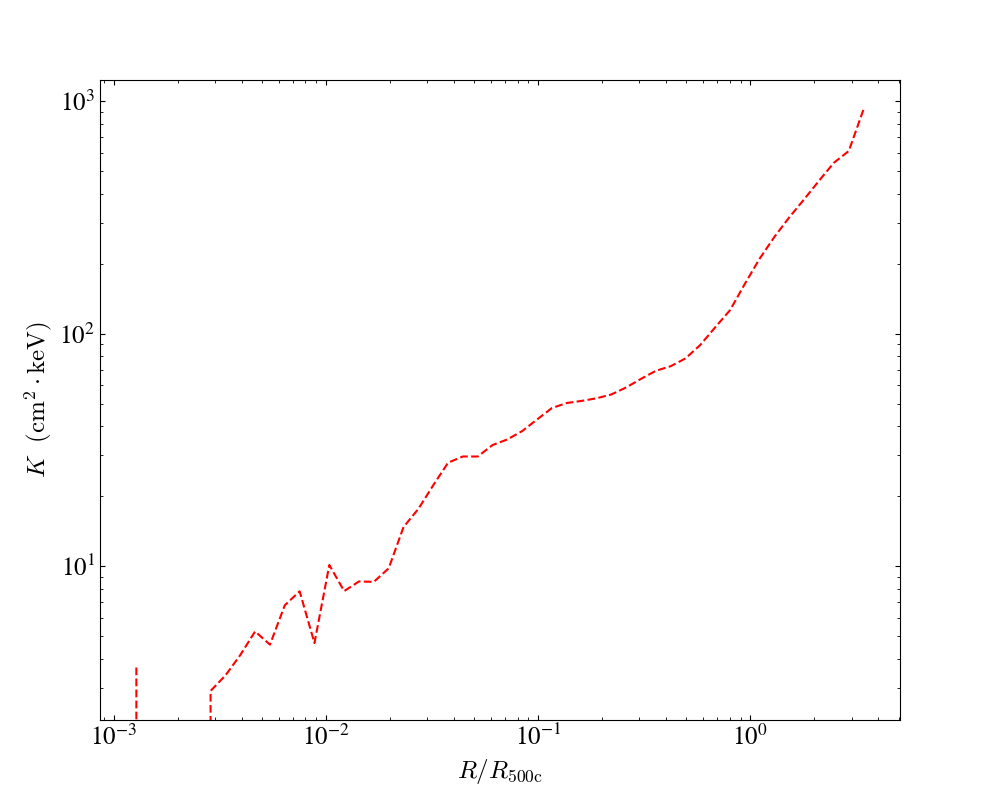

In [90]:
plot = yt.ProfilePlot(data_source=sphere_igrm,
                      x_field=('gas', 'r_r500'),
                      y_fields=[('gas', 'entropy_')],
                      weight_field=('gas', 'mass'),
                      n_bins=50, x_log=True, y_log=True,
                      plot_spec={'color':'red', 'ls':'-'})
# plot.set_unit(('gas', 'radius'), 'kpc')
# plot.set_log(('gas', 'radius'), False)
plot.show()

In [111]:
igrm_entropy_profile = yt.create_profile(sphere_igrm, 
                                         ('index', 'radius'), ('gas', 'entropy'),
                                         units={("index", "radius"): "kpc"},
                                         logs={("index", "radius"): False},)

AttributeError: 'tuple' object has no attribute 'sampling_type'

In [88]:
igrm_entropy_profile = igrm_zoom_sphere.profile(bin_fields=('index', 'radius'),
                                                fields=('PartType0', 'gas_entropy'),
                                                n_bins=32,
                                                weight_field='mass',
#                                              units={("index", "radius"): "kpc"},
                                                units={("PartType0", "mass"):"Msun",
                                                       ('PartType0', 'gas_entropy'):'keV*cm**2'},
#                                          logs={("index", "radius"): False},)
                                               )

AttributeError: 'tuple' object has no attribute 'sampling_type'

In [84]:
igrm_entropy_profile

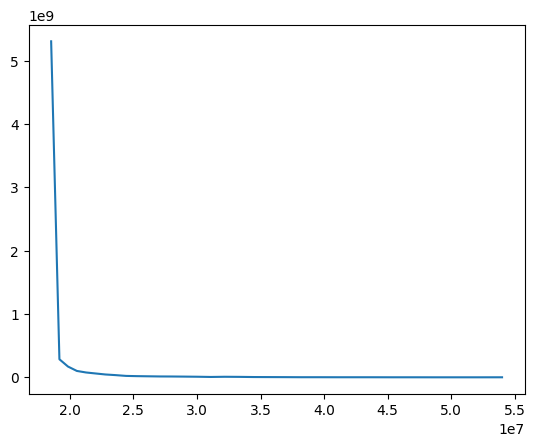

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(
    igrm_entropy_profile.x.value,
    igrm_entropy_profile["PartType0", "gas_entropy"].value,
)

# ax.set_xlabel(r"$\mathrm{r\ (kpc)}$")
# ax.set_ylabel(r"$\mathrm{v_r\ (km/s)}$")

# Calculate profile manually

In [39]:
# radial_bins = unyt.unyt_array(np.append([0], np.logspace(-1, np.log10(5), 20)), 'Mpc')
radial_bins = unyt.unyt_array(np.append([0], np.logspace(-3, np.log10(10), 50)), 'Mpc')

In [40]:
radial_bins

unyt_array([0.00000000e+00, 1.00000000e-03, 1.20679264e-03, 1.45634848e-03,
       1.75751062e-03, 2.12095089e-03, 2.55954792e-03, 3.08884360e-03,
       3.72759372e-03, 4.49843267e-03, 5.42867544e-03, 6.55128557e-03,
       7.90604321e-03, 9.54095476e-03, 1.15139540e-02, 1.38949549e-02,
       1.67683294e-02, 2.02358965e-02, 2.44205309e-02, 2.94705170e-02,
       3.55648031e-02, 4.29193426e-02, 5.17947468e-02, 6.25055193e-02,
       7.54312006e-02, 9.10298178e-02, 1.09854114e-01, 1.32571137e-01,
       1.59985872e-01, 1.93069773e-01, 2.32995181e-01, 2.81176870e-01,
       3.39322177e-01, 4.09491506e-01, 4.94171336e-01, 5.96362332e-01,
       7.19685673e-01, 8.68511374e-01, 1.04811313e+00, 1.26485522e+00,
       1.52641797e+00, 1.84206997e+00, 2.22299648e+00, 2.68269580e+00,
       3.23745754e+00, 3.90693994e+00, 4.71486636e+00, 5.68986603e+00,
       6.86648845e+00, 8.28642773e+00, 1.00000000e+01], 'Mpc')

In [234]:
gas_zoom_centre.in_units('Mpc')

unyt_array([148.25355584, 146.82190372, 138.89211282], 'Mpc')

In [41]:
min_gas_pot_pos.in_units('Mpc')

unyt_array([143.24756434, 150.32729779, 152.98390395], 'Mpc')

In [236]:
# max_gas_pot_pos.in_units('Mpc')

In [237]:
# min_pot_pos.in_units('Mpc')

In [238]:
# max_pot_pos.in_units('Mpc')

In [239]:
most_massive_bh_pos.in_units('Mpc')

unyt_array([122.61841682, 151.00165441, 150.9509421 ], 'Mpc')

In [240]:
# most_dyn_massive_bh_pos.in_units('Mpc')

In [241]:
rho_max_pos.in_units('Mpc')

unyt_array([122.61507353, 151.00044807, 150.95179228], 'Mpc')

In [42]:
igrm_pos_x = igrm['gas', 'particle_position_x']

Text(0, 0.5, 'Count')

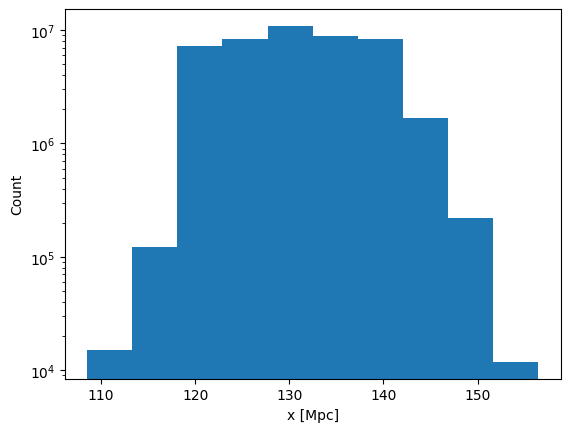

In [243]:
plt.hist(data['gas', 'particle_position_x'].in_units('Mpc'), log=True)
plt.xlabel('x [Mpc]')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

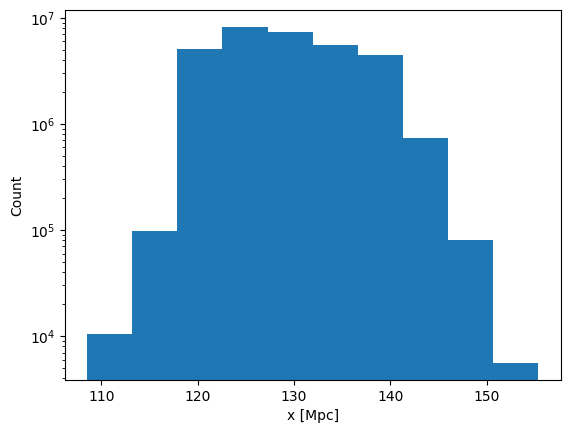

In [244]:
plt.hist(igrm_pos_x.in_units('Mpc'), log=True)
plt.xlabel('x [Mpc]')
plt.ylabel('Count')

In [43]:
igrm_pos_y = igrm['gas', 'particle_position_y']

Text(0, 0.5, 'Count')

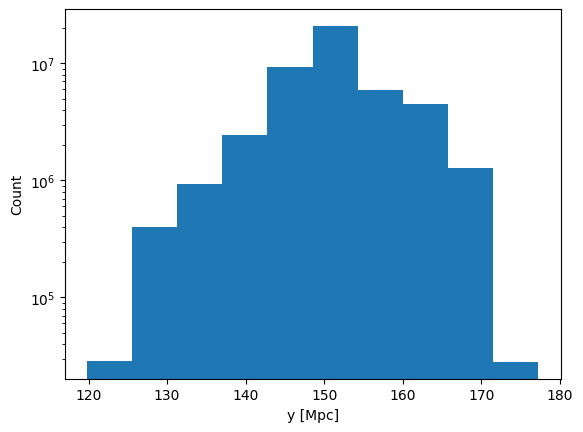

In [246]:
plt.hist(data['gas', 'particle_position_y'].in_units('Mpc'), log=True)
plt.xlabel('y [Mpc]')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

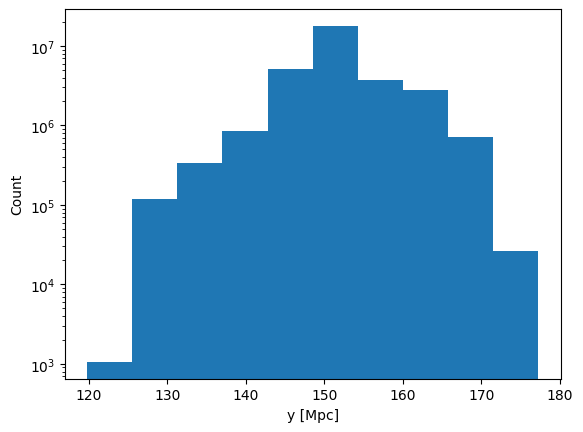

In [247]:
plt.hist(igrm_pos_y.in_units('Mpc'), log=True)
plt.xlabel('y [Mpc]')
plt.ylabel('Count')

In [44]:
igrm_pos_z = igrm['gas', 'particle_position_z']

Text(0, 0.5, 'Count')

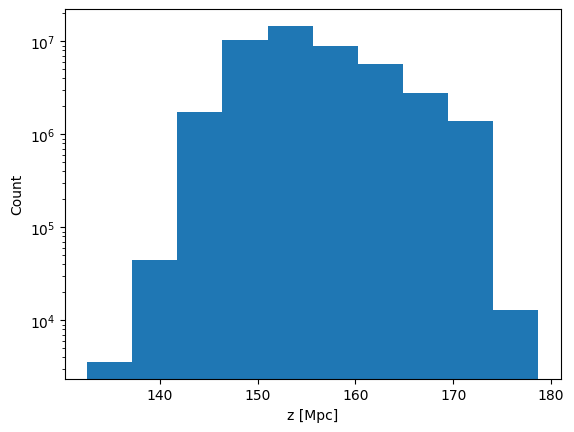

In [249]:
plt.hist(data['gas', 'particle_position_z'].in_units('Mpc'), log=True)
plt.xlabel('z [Mpc]')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

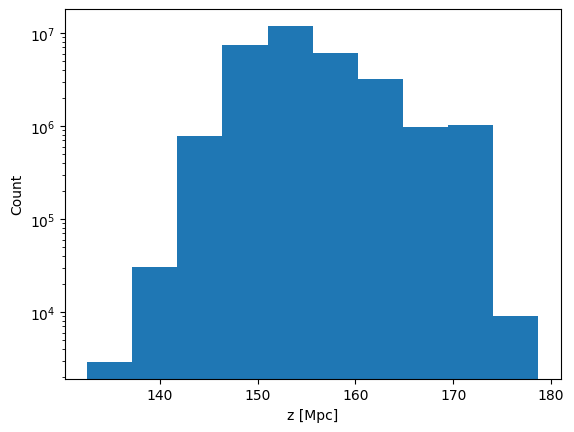

In [250]:
plt.hist(igrm_pos_z.in_units('Mpc'), log=True)
plt.xlabel('z [Mpc]')
plt.ylabel('Count')

In [251]:
# gas_pos

In [252]:
len(igrm_pos_x)

31549166

In [253]:
# igrm_zoom_radii = ((gas_pos[:,0]-gas_zoom_centre[0])**2 + 
#                   (gas_pos[:,1]-gas_zoom_centre[1])**2 + 
#                   (gas_pos[:,2]-gas_zoom_centre[2])**2)**0.5

In [254]:
igrm_zoom_radii_rel_centre = ((igrm_pos_x-gas_zoom_centre[0])**2 + 
                  (igrm_pos_y-gas_zoom_centre[1])**2 + 
                  (igrm_pos_z-gas_zoom_centre[2])**2)**0.5

In [45]:
igrm_zoom_radii_rel_min_gas_pot = ((igrm_pos_x-min_gas_pot_pos[0])**2 + 
                  (igrm_pos_y-min_gas_pot_pos[1])**2 + 
                  (igrm_pos_z-min_gas_pot_pos[2])**2)**0.5

In [256]:
# igrm_zoom_radii_rel_max_gas_pot = ((igrm_pos_x-max_gas_pot_pos[0])**2 + 
#                   (igrm_pos_y-max_gas_pot_pos[1])**2 + 
#                   (igrm_pos_z-max_gas_pot_pos[2])**2)**0.5

In [257]:
# igrm_zoom_radii_rel_min_pot = ((igrm_pos_x-min_pot_pos[0])**2 + 
#                   (igrm_pos_y-min_pot_pos[1])**2 + 
#                   (igrm_pos_z-min_pot_pos[2])**2)**0.5

In [258]:
# igrm_zoom_radii_rel_max_pot = ((igrm_pos_x-max_pot_pos[0])**2 + 
#                   (igrm_pos_y-max_pot_pos[1])**2 + 
#                   (igrm_pos_z-max_pot_pos[2])**2)**0.5

In [259]:
igrm_zoom_radii_rel_bh_mass_max = ((igrm_pos_x-most_massive_bh_pos[0])**2 + 
                  (igrm_pos_y-most_massive_bh_pos[1])**2 + 
                  (igrm_pos_z-most_massive_bh_pos[2])**2)**0.5

In [260]:
# igrm_zoom_radii_rel_bh_dyn_mass_max = ((igrm_pos_x-most_dyn_massive_bh_pos[0])**2 + 
#                   (igrm_pos_y-most_dyn_massive_bh_pos[1])**2 + 
#                   (igrm_pos_z-most_dyn_massive_bh_pos[2])**2)**0.5

In [261]:
igrm_zoom_radii_rel_rho_max = ((igrm_pos_x-rho_max_pos[0])**2 + 
                  (igrm_pos_y-rho_max_pos[1])**2 + 
                  (igrm_pos_z-rho_max_pos[2])**2)**0.5

In [262]:
# igrm_zoom_entropies = data['gas', 'entropy']

In [48]:
igrm_zoom_entropies = igrm['gas', 'entropy']

/gpfs/fs1/home/b/babul/aspadawe/pyenvs/visualize_with_yt/lib/python3.11/site-packages/unyt/array.py:1949: RuntimeWarning: divide by zero encountered in power
  out_arr = func(


In [49]:
# gas_zoom_masses = data['gas', 'mass']

In [50]:
igrm_zoom_masses = igrm['gas', 'mass']

### Change this for the centre you want!

In [46]:
igrm_zoom_radii = igrm_zoom_radii_rel_min_gas_pot

In [47]:
igrm_zoom_radii.in_units('Mpc')

unyt_array([18.02633719, 18.09641917, 18.09770843, ..., 16.73404028,
       16.73788411, 16.73879019], shape=(28443139,), units='Mpc')

In [51]:
entropy_profile_median = []
entropy_profile_mean = []
entropy_profile_mass_weighted = []
for bin_lo, bin_hi in zip(radial_bins[:-1], radial_bins[1:]):
#     print(bin_lo, bin_hi)
    radial_filter = np.logical_and(igrm_zoom_radii.in_units('Mpc').value>=bin_lo.in_units('Mpc').value,
                                   igrm_zoom_radii.in_units('Mpc').value<=bin_hi.in_units('Mpc').value)
#     print(np.where(radial_filter))
    entropies = igrm_zoom_entropies[radial_filter]
    masses = igrm_zoom_masses[radial_filter]
    print(len(entropies))
    print(len(masses))
#     print()
    
    entropy_profile_median.append(np.nanmedian(entropies))
    entropy_profile_mean.append(np.nanmean(entropies))
    if sum(masses)>0:
        K_mass = np.average(entropies, weights=masses)
    else:
        K_mass = np.nan
    
    entropy_profile_mass_weighted.append(K_mass)
    print(K_mass)
    print()

1
1
9.328035521545852 cm**2*keV

0
0
nan



/gpfs/fs1/home/b/babul/aspadawe/pyenvs/visualize_with_yt/lib/python3.11/site-packages/unyt/array.py:2040: RuntimeWarning: Mean of empty slice
  return func._implementation(*args, **kwargs)


1
1
11.711439897974444 cm**2*keV

3
3
12.161223996345191 cm**2*keV

3
3
13.496756812045122 cm**2*keV

8
8
13.196408209156347 cm**2*keV

14
14
16.510977228155443 cm**2*keV

26
26
26.575197974511976 cm**2*keV

24
24
38.35834965069246 cm**2*keV

70
70
43.08552697051227 cm**2*keV

189
189
32.18569091240249 cm**2*keV

486
486
22.015224847599345 cm**2*keV

899
899
20.068656333454193 cm**2*keV

1437
1437
20.26343332439058 cm**2*keV

2122
2122
21.16711797237552 cm**2*keV

3168
3168
22.85647276567686 cm**2*keV

4588
4588
25.081211342410874 cm**2*keV

6653
6653
26.836460313688224 cm**2*keV

9480
9480
30.00249125752817 cm**2*keV

12891
12891
34.39705382168423 cm**2*keV

17726
17726
40.23292397889425 cm**2*keV

24333
24333
47.574715585387345 cm**2*keV

32681
32681
56.673607903546966 cm**2*keV

43945
43945
66.59534874655097 cm**2*keV

57831
57831
75.40090728645444 cm**2*keV

80496
80496
87.25008082996109 cm**2*keV

110365
110365
102.0674502003755 cm**2*keV

141614
141614
116.44380866058071 cm**2*ke

In [52]:
entropy_profile_median

[unyt_quantity(9.32803552, 'cm**2*keV'),
 unyt_quantity(nan, 'cm**2*keV'),
 unyt_quantity(11.7114399, 'cm**2*keV'),
 unyt_quantity(12.42836329, 'cm**2*keV'),
 unyt_quantity(11.85089956, 'cm**2*keV'),
 unyt_quantity(13.58602959, 'cm**2*keV'),
 unyt_quantity(17.71853856, 'cm**2*keV'),
 unyt_quantity(26.16945507, 'cm**2*keV'),
 unyt_quantity(34.35824153, 'cm**2*keV'),
 unyt_quantity(32.10421783, 'cm**2*keV'),
 unyt_quantity(19.79690205, 'cm**2*keV'),
 unyt_quantity(16.00644076, 'cm**2*keV'),
 unyt_quantity(16.18298922, 'cm**2*keV'),
 unyt_quantity(18.20224726, 'cm**2*keV'),
 unyt_quantity(19.74059075, 'cm**2*keV'),
 unyt_quantity(21.63820046, 'cm**2*keV'),
 unyt_quantity(23.8225039, 'cm**2*keV'),
 unyt_quantity(25.46989716, 'cm**2*keV'),
 unyt_quantity(28.88052195, 'cm**2*keV'),
 unyt_quantity(33.81586015, 'cm**2*keV'),
 unyt_quantity(40.27426161, 'cm**2*keV'),
 unyt_quantity(48.22179798, 'cm**2*keV'),
 unyt_quantity(57.5588222, 'cm**2*keV'),
 unyt_quantity(67.65707073, 'cm**2*keV'),
 uny

In [53]:
entropy_profile_mean

[unyt_quantity(9.32803552, 'cm**2*keV'),
 unyt_quantity(nan, 'cm**2*keV'),
 unyt_quantity(11.7114399, 'cm**2*keV'),
 unyt_quantity(12.09007065, 'cm**2*keV'),
 unyt_quantity(13.54856777, 'cm**2*keV'),
 unyt_quantity(13.2819698, 'cm**2*keV'),
 unyt_quantity(17.18137834, 'cm**2*keV'),
 unyt_quantity(27.1965935, 'cm**2*keV'),
 unyt_quantity(38.75282409, 'cm**2*keV'),
 unyt_quantity(41.75253452, 'cm**2*keV'),
 unyt_quantity(32.50660136, 'cm**2*keV'),
 unyt_quantity(22.6760144, 'cm**2*keV'),
 unyt_quantity(20.76442388, 'cm**2*keV'),
 unyt_quantity(20.8903478, 'cm**2*keV'),
 unyt_quantity(21.72676538, 'cm**2*keV'),
 unyt_quantity(23.3169715, 'cm**2*keV'),
 unyt_quantity(25.57398622, 'cm**2*keV'),
 unyt_quantity(27.34820655, 'cm**2*keV'),
 unyt_quantity(30.55302834, 'cm**2*keV'),
 unyt_quantity(35.02066182, 'cm**2*keV'),
 unyt_quantity(40.89398936, 'cm**2*keV'),
 unyt_quantity(48.28567075, 'cm**2*keV'),
 unyt_quantity(57.48605472, 'cm**2*keV'),
 unyt_quantity(67.48128312, 'cm**2*keV'),
 unyt_q

In [54]:
entropy_profile_mass_weighted

[unyt_quantity(9.32803552, 'cm**2*keV'),
 nan,
 unyt_quantity(11.7114399, 'cm**2*keV'),
 unyt_quantity(12.161224, 'cm**2*keV'),
 unyt_quantity(13.49675681, 'cm**2*keV'),
 unyt_quantity(13.19640821, 'cm**2*keV'),
 unyt_quantity(16.51097723, 'cm**2*keV'),
 unyt_quantity(26.57519797, 'cm**2*keV'),
 unyt_quantity(38.35834965, 'cm**2*keV'),
 unyt_quantity(43.08552697, 'cm**2*keV'),
 unyt_quantity(32.18569091, 'cm**2*keV'),
 unyt_quantity(22.01522485, 'cm**2*keV'),
 unyt_quantity(20.06865633, 'cm**2*keV'),
 unyt_quantity(20.26343332, 'cm**2*keV'),
 unyt_quantity(21.16711797, 'cm**2*keV'),
 unyt_quantity(22.85647277, 'cm**2*keV'),
 unyt_quantity(25.08121134, 'cm**2*keV'),
 unyt_quantity(26.83646031, 'cm**2*keV'),
 unyt_quantity(30.00249126, 'cm**2*keV'),
 unyt_quantity(34.39705382, 'cm**2*keV'),
 unyt_quantity(40.23292398, 'cm**2*keV'),
 unyt_quantity(47.57471559, 'cm**2*keV'),
 unyt_quantity(56.6736079, 'cm**2*keV'),
 unyt_quantity(66.59534875, 'cm**2*keV'),
 unyt_quantity(75.40090729, 'cm**

In [55]:
radial_bin_centres = (radial_bins[:-1] + radial_bins[1:])/2.

In [56]:
radial_bin_centres_logged = np.log10(radial_bin_centres)

In [57]:
log_radial_bin_centres = (np.log10(radial_bins[:-1]) + np.log10(radial_bins[1:]))/2.

/gpfs/fs1/home/b/babul/aspadawe/pyenvs/visualize_with_yt/lib/python3.11/site-packages/unyt/array.py:1824: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


In [58]:
log_radial_bin_centres_unlogged = 10**log_radial_bin_centres

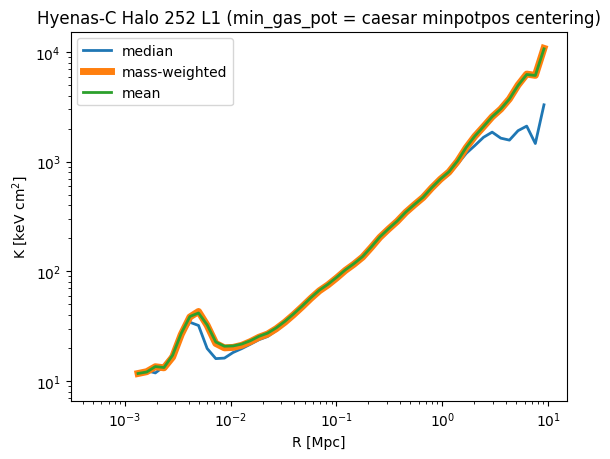

In [61]:
plt.plot(radial_bin_centres, entropy_profile_median, label='median', lw=2)
plt.plot(radial_bin_centres, entropy_profile_mass_weighted, label='mass-weighted', lw=5)
plt.plot(radial_bin_centres, entropy_profile_mean, label='mean', lw=2)
plt.title('Hyenas-C Halo 252 L1 (min_gas_pot = caesar minpotpos centering)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R [Mpc]')
plt.ylabel(r'K [keV $\mathrm{cm^2}$]')
plt.legend()